# Análise variação do preço da gasolina

**Objetivo da análise**

Gerar uma tabela com a variação percentural ano a ano do preço médio da gasolina comum no estado do Rio de Janeiro.

**Base de Dados no Kaggle**

[https://www.kaggle.com/datasets/matheusfreitag/gas-prices-in-brazil](https://www.kaggle.com/datasets/matheusfreitag/gas-prices-in-brazil)

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [5]:
#Abrindo o arquivo

df = pd.read_csv('precos.tsv', sep='\t', parse_dates=['DATA INICIAL','DATA FINAL'])
df.head()

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082


In [6]:
df_tratado = df.copy()

In [7]:
colunas = ['data_inicial', 'data_final', 'regiao', 'estado', 'produto',
       'numero_postos_pesquisado', 'unidade_medida',
       'preco_medio_revenda', 'std_revenda', 'min_revenda',
       'max_revenda', 'media_revenda',
       'variacao_revenda', 'media_distribuicao',
       'std_distribuicao', 'min_distribuicao',
       'max_distribuicao', 'variacao_distribuicao']

In [8]:
df_tratado.columns = colunas

In [9]:
df_tratado['estado'].isna().sum() # NADA É NULO EM ESTADO

0

In [14]:
df_tratado['produto'].isna().sum() # NADA É NULO EM PRODUTO

0

In [35]:
df_rj_gasolina = df_tratado.query("estado == 'RIO DE JANEIRO' and produto == 'GASOLINA COMUM'")
df_rj_gasolina

,data_inicial,data_final,regiao,estado,produto,numero_postos_pesquisado,unidade_medida,preco_medio_revenda,std_revenda,min_revenda,max_revenda,media_revenda,variacao_revenda,media_distribuicao,std_distribuicao,min_distribuicao,max_distribuicao,variacao_distribuicao
12086,2004-05-09,2004-05-15,SUDESTE,RIO DE JANEIRO,GASOLINA COMUM,1071,R$/l,2.045,0.109,1.700,2.599,0.254,0.053,1.791,0.047,1.6363,1.9594,0.026
12113,2004-05-16,2004-05-22,SUDESTE,RIO DE JANEIRO,GASOLINA COMUM,1055,R$/l,2.040,0.113,1.700,2.599,0.252,0.055,1.788,0.049,1.5943,1.99651,0.027
12140,2004-05-23,2004-05-29,SUDESTE,RIO DE JANEIRO,GASOLINA COMUM,1091,R$/l,2.042,0.108,1.700,2.599,0.252,0.053,1.79,0.046,1.63596,2.2137,0.026
12167,2004-05-30,2004-06-05,SUDESTE,RIO DE JANEIRO,GASOLINA COMUM,1055,R$/l,2.053,0.111,1.730,2.599,0.251,0.054,1.802,0.055,1.64,2.21425,0.031
12194,2004-06-06,2004-06-12,SUDESTE,RIO DE JANEIRO,GASOLINA COMUM,1091,R$/l,2.063,0.107,1.760,2.599,0.247,0.052,1.816,0.054,1.64,2.32425,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120003,2021-03-28,2021-04-03,SUDESTE,RIO DE JANEIRO,GASOLINA COMUM,276,R$/l,6.102,0.197,5.599,6.559,-99999.0,0.032,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0
120181,2021-04-04,2021-04-10,SUDESTE,RIO DE JANEIRO,GASOLINA COMUM,275,R$/l,6.007,0.193,5.299,6.499,-99999.0,0.032,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0
120360,2021-04-11,2021-04-17,SUDESTE,RIO DE JANEIRO,GASOLINA COMUM,261,R$/l,6.016,0.209,5.399,6.516,-99999.0,0.035,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0
120538,2021-04-18,2021-04-24,SUDESTE,RIO DE JANEIRO,GASOLINA COMUM,240,R$/l,6.071,0.217,5.399,6.599,-99999.0,0.036,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0


In [ ]:
df_rj_gasolina.set_index('data_final', inplace=True)

In [38]:
df_rj_gasolina.head()

,data_inicial,regiao,estado,produto,numero_postos_pesquisado,unidade_medida,preco_medio_revenda,std_revenda,min_revenda,max_revenda,media_revenda,variacao_revenda,media_distribuicao,std_distribuicao,min_distribuicao,max_distribuicao,variacao_distribuicao
data_final,,,,,,,,,,,,,,,,,
2004-05-15,2004-05-09,SUDESTE,RIO DE JANEIRO,GASOLINA COMUM,1071,R$/l,2.045,0.109,1.70,2.599,0.254,0.053,1.791,0.047,1.6363,1.9594,0.026
2004-05-22,2004-05-16,SUDESTE,RIO DE JANEIRO,GASOLINA COMUM,1055,R$/l,2.040,0.113,1.70,2.599,0.252,0.055,1.788,0.049,1.5943,1.99651,0.027
2004-05-29,2004-05-23,SUDESTE,RIO DE JANEIRO,GASOLINA COMUM,1091,R$/l,2.042,0.108,1.70,2.599,0.252,0.053,1.79,0.046,1.63596,2.2137,0.026
2004-06-05,2004-05-30,SUDESTE,RIO DE JANEIRO,GASOLINA COMUM,1055,R$/l,2.053,0.111,1.73,2.599,0.251,0.054,1.802,0.055,1.64,2.21425,0.031
2004-06-12,2004-06-06,SUDESTE,RIO DE JANEIRO,GASOLINA COMUM,1091,R$/l,2.063,0.107,1.76,2.599,0.247,0.052,1.816,0.054,1.64,2.32425,0.03


In [39]:
# VERIFICANDO ANOS E MESES DO DATASET
datas = []
for i in df_rj_gasolina.index:
    datas.append((i.year,i.month))

In [41]:
set(datas)

{(2004, 5),
 (2004, 6),
 (2004, 7),
 (2004, 8),
 (2004, 9),
 (2004, 10),
 (2004, 11),
 (2004, 12),
 (2005, 1),
 (2005, 2),
 (2005, 3),
 (2005, 4),
 (2005, 5),
 (2005, 6),
 (2005, 7),
 (2005, 8),
 (2005, 9),
 (2005, 10),
 (2005, 11),
 (2005, 12),
 (2006, 1),
 (2006, 2),
 (2006, 3),
 (2006, 4),
 (2006, 5),
 (2006, 6),
 (2006, 7),
 (2006, 8),
 (2006, 9),
 (2006, 10),
 (2006, 11),
 (2006, 12),
 (2007, 1),
 (2007, 2),
 (2007, 3),
 (2007, 4),
 (2007, 5),
 (2007, 6),
 (2007, 7),
 (2007, 8),
 (2007, 9),
 (2007, 10),
 (2007, 11),
 (2007, 12),
 (2008, 1),
 (2008, 2),
 (2008, 3),
 (2008, 4),
 (2008, 5),
 (2008, 6),
 (2008, 7),
 (2008, 8),
 (2008, 9),
 (2008, 10),
 (2008, 11),
 (2008, 12),
 (2009, 1),
 (2009, 2),
 (2009, 3),
 (2009, 4),
 (2009, 5),
 (2009, 6),
 (2009, 7),
 (2009, 8),
 (2009, 9),
 (2009, 10),
 (2009, 11),
 (2009, 12),
 (2010, 1),
 (2010, 2),
 (2010, 3),
 (2010, 4),
 (2010, 5),
 (2010, 6),
 (2010, 7),
 (2010, 8),
 (2010, 9),
 (2010, 10),
 (2010, 11),
 (2010, 12),
 (2011, 1),
 (2011,

In [43]:
# RETIRANDO OS ANOS QUE ESTÃO INCOMPLETOS
df_rj_gasolina = df_rj_gasolina.loc['2005':'2020'].copy()

In [45]:
df_rj_gasolina.shape

(822, 17)

<AxesSubplot: >

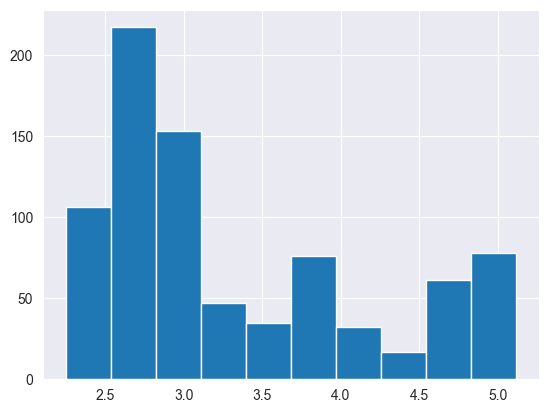

In [88]:
plt.figure(figsize=(15,5))
df_rj_gasolina['preco_medio_revenda'].hist()
plt.savefig('histograma.png')

<AxesSubplot: xlabel='preco_medio_revenda'>

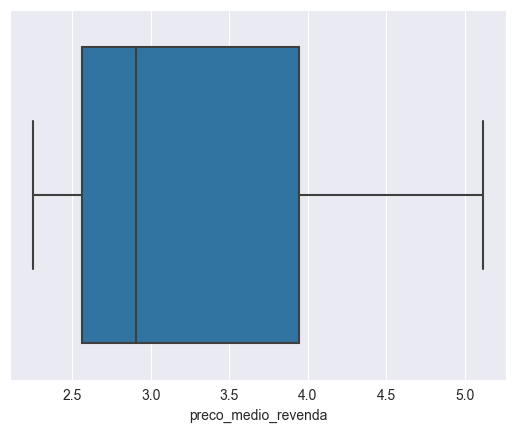

In [50]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,5))
sns.boxplot(data=df_rj_gasolina, x='preco_medio_revenda')
# MOSTRA QUE NÃO TEMOS OUTLIERS
plt.savefig('boxplot.png')

In [55]:
df_rj_gasolina['preco_medio_revenda'].describe()

count    822.000000
mean       3.303408
std        0.871114
min        2.247000
25%        2.559250
50%        2.903000
75%        3.942250
max        5.119000
Name: preco_medio_revenda, dtype: float64

In [57]:
# GERANDO A TABELA DE VARIAÇÃO PERCENTUAL
df_rj_gasolina.head()

,data_inicial,regiao,estado,produto,numero_postos_pesquisado,unidade_medida,preco_medio_revenda,std_revenda,min_revenda,max_revenda,media_revenda,variacao_revenda,media_distribuicao,std_distribuicao,min_distribuicao,max_distribuicao,variacao_distribuicao
data_final,,,,,,,,,,,,,,,,,
2005-01-01,2004-12-26,SUDESTE,RIO DE JANEIRO,GASOLINA COMUM,1066,R$/l,2.293,0.101,2.050,2.749,0.212,0.044,2.081,0.04,1.9514,2.27902,0.019
2005-01-08,2005-01-02,SUDESTE,RIO DE JANEIRO,GASOLINA COMUM,1096,R$/l,2.297,0.098,1.990,2.749,0.213,0.043,2.084,0.041,1.95583,2.3374,0.02
2005-01-15,2005-01-09,SUDESTE,RIO DE JANEIRO,GASOLINA COMUM,1069,R$/l,2.292,0.101,2.039,2.749,0.213,0.044,2.079,0.041,1.963,2.3312,0.02
2005-01-22,2005-01-16,SUDESTE,RIO DE JANEIRO,GASOLINA COMUM,1094,R$/l,2.296,0.099,2.000,2.749,0.213,0.043,2.083,0.039,1.9742,2.3379,0.019
2005-01-29,2005-01-23,SUDESTE,RIO DE JANEIRO,GASOLINA COMUM,1073,R$/l,2.290,0.103,2.009,2.749,0.205,0.045,2.085,0.041,1.963,2.32173,0.02


In [60]:
# CARREGANDO O ULTIMO DADO DE CADA ANO
df_rj_gasolina.groupby(df_rj_gasolina.index.year).last()

,data_inicial,regiao,estado,produto,numero_postos_pesquisado,unidade_medida,preco_medio_revenda,std_revenda,min_revenda,max_revenda,media_revenda,variacao_revenda,media_distribuicao,std_distribuicao,min_distribuicao,max_distribuicao,variacao_distribuicao
data_final,,,,,,,,,,,,,,,,,
2005,2005-12-25,SUDESTE,RIO DE JANEIRO,GASOLINA COMUM,933,R$/l,2.508,0.116,2.219,2.960,0.229,0.046,2.279,0.055,2.1094,2.5194,0.024
2006,2006-12-24,SUDESTE,RIO DE JANEIRO,GASOLINA COMUM,890,R$/l,2.531,0.140,2.260,3.050,0.251,0.055,2.28,0.05,2.0911,2.4915,0.022
2007,2007-12-23,SUDESTE,RIO DE JANEIRO,GASOLINA COMUM,741,R$/l,2.540,0.135,2.289,3.090,0.274,0.053,2.266,0.059,2.16,2.4484,0.026
2008,2008-12-21,SUDESTE,RIO DE JANEIRO,GASOLINA COMUM,743,R$/l,2.565,0.122,2.290,3.190,0.286,0.048,2.279,0.06,2.1533,2.4745,0.026
2009,2009-12-20,SUDESTE,RIO DE JANEIRO,GASOLINA COMUM,564,R$/l,2.607,0.108,2.379,3.299,0.265,0.041,2.342,0.048,2.2185,2.5729,0.02
2010,2010-12-19,SUDESTE,RIO DE JANEIRO,GASOLINA COMUM,738,R$/l,2.660,0.115,2.399,3.249,0.293,0.043,2.367,0.053,2.2479,2.5426,0.022
2011,2011-12-25,SUDESTE,RIO DE JANEIRO,GASOLINA COMUM,730,R$/l,2.849,0.121,2.599,3.499,0.371,0.042,2.478,0.067,2.2939,2.6722,0.027
2012,2012-12-23,SUDESTE,RIO DE JANEIRO,GASOLINA COMUM,736,R$/l,2.877,0.115,2.549,3.799,0.357,0.040,2.52,0.058,2.335,2.7009,0.023
2013,2013-12-22,SUDESTE,RIO DE JANEIRO,GASOLINA COMUM,733,R$/l,3.072,0.137,2.759,4.069,0.414,0.045,2.658,0.075,2.4356,2.8765,0.028


In [63]:
# CARREGANDO O ULTIMO DADO DE CADA ANO
df_tabela = df_rj_gasolina.groupby(df_rj_gasolina.index.year).agg({
    'preco_medio_revenda': np.mean
})

In [64]:
df_tabela

,preco_medio_revenda
data_final,
2005,2.338588
2006,2.561365
2007,2.532077
2008,2.546731
2009,2.564980
2010,2.647788
2011,2.832698
2012,2.852827
2013,2.995442


In [65]:
df_tabela.shift(1)

,preco_medio_revenda
data_final,
2005,NaN
2006,2.338588
2007,2.561365
2008,2.532077
2009,2.546731
2010,2.564980
2011,2.647788
2012,2.832698
2013,2.852827


In [66]:
df_tabela['valor_ano_anterior'] = df_tabela.shift(1)

In [75]:
df_tabela = df_tabela.loc[2006:].copy()

In [77]:
df_tabela['variacao_percentual'] = round(((df_tabela['preco_medio_revenda'] / df_tabela['valor_ano_anterior']) - 1) * 100,2)

In [78]:
df_tabela

,preco_medio_revenda,valor_ano_anterior,variacao_percentual
data_final,,,
2006,2.561365,2.338588,9.53
2007,2.532077,2.561365,-1.14
2008,2.546731,2.532077,0.58
2009,2.564980,2.546731,0.72
2010,2.647788,2.564980,3.23
2011,2.832698,2.647788,6.98
2012,2.852827,2.832698,0.71
2013,2.995442,2.852827,5.00
2014,3.132115,2.995442,4.56


In [80]:
df_tabela.to_excel('tabela_variacao_gasolina_rj.xlsx')